# Correlation of probability of success per minute and overall outcome

## Determine Most Correlated Minutes

Dataset is from Nate Silver's blog FiveThirtyEight, and provides information regard probability of win for any NBA team for each minute in a game.  I am going to use this data to determine the correlation between each minute and the overall outcome of the basketball game.

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  9 14:05:01 2016

@author: mikebaldwin
"""

import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy.stats as st
import random as rand
import tensorflow as tf
%matplotlib inline


data_file = open("nba.csv", "r");

#create an empty list to store the data
nba_minutes = []
#put all lines from the file into a list
for ii in data_file:
    nba_minutes.append(ii);
    
#remove the first element (column header)
del nba_minutes[0]
    
for i in range(0, len(nba_minutes)):
    nba_minutes[i] = nba_minutes[i].replace("\n", "");
    nba_minutes[i] = nba_minutes[i].split(",")

theseMinutes = []
for minute in range(49):
    theseMinutes.append([])

#make lists based off of per minute
for thisTeam in range(len(nba_minutes)):
    for thisMinutes in range(len(nba_minutes[thisTeam]) - 1):
        theseMinutes[thisMinutes].append(float(nba_minutes[thisTeam][thisMinutes + 1]))

#calculate correlation
maxCor = []

for i in range(len(theseMinutes)-1):
    maxCor.append([i, st.pearsonr(theseMinutes[i],theseMinutes[48])])

    
maxCor.sort()

maxCorThree = maxCor[len(maxCor)-3:len(maxCor)]
#list to store all of this minute
this_minute = []
this_48 = []
fig = plt.figure()
count = 0
print("The three most correlated minutes are (in order):")
for i in range(len(maxCorThree),0,-1):
    #print mst correlated minutes and the correlation coeffeicent
    print(maxCorThree[i-1][0], "Correlation:", maxCorThree[i-1][1][0])
    #make a list that stores all the i minutes for every team
    for thisTeam in range(len(nba_minutes)):
        this_minute.append(float(nba_minutes[thisTeam][i+1]))
        this_48.append(float(nba_minutes[thisTeam][48]))

The three most correlated minutes are (in order):
47 Correlation: 0.996157792014
46 Correlation: 0.991841945036
45 Correlation: 0.988456437901


 ## Create Scatterplots for these minutes

Linear Regression Slope: 0.932480397843


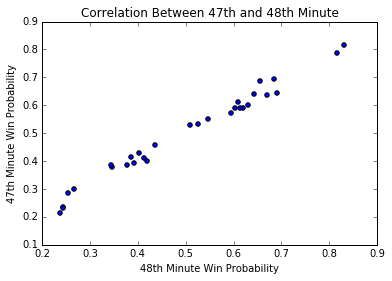

In [18]:
#Create Scatterplot
this_minute = []
this_48 = []
for thisTeam in range(len(nba_minutes)):
        this_minute.append(float(nba_minutes[thisTeam][47]))
        this_48.append(float(nba_minutes[thisTeam][48]))
plt.scatter(this_48, this_minute)
plt.title("Correlation Between 47th and 48th Minute")
plt.xlabel("48th Minute Win Probability")
plt.ylabel("47th Minute Win Probability")
#Calculate and Print LinReg Slope
linregression = st.linregress(this_48, this_minute)
print("Linear Regression Slope:", linregression[0])

Linear Regression Slope: 0.893421967773


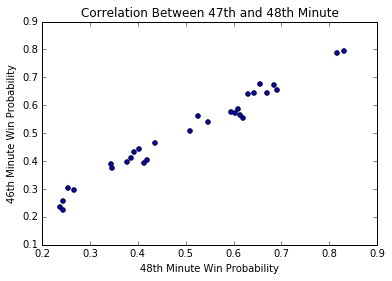

In [19]:
#Create Scatterplot
this_minute = []
this_48 = []
for thisTeam in range(len(nba_minutes)):
        this_minute.append(float(nba_minutes[thisTeam][46]))
        this_48.append(float(nba_minutes[thisTeam][48]))
plt.scatter(this_48, this_minute)
plt.title("Correlation Between 46th and 48th Minute")
plt.xlabel("48th Minute Win Probability")
plt.ylabel("46th Minute Win Probability")
linregression = st.linregress(this_48, this_minute)
print("Linear Regression Slope:", linregression[0])

Linear Regression Slope: 0.868231939965


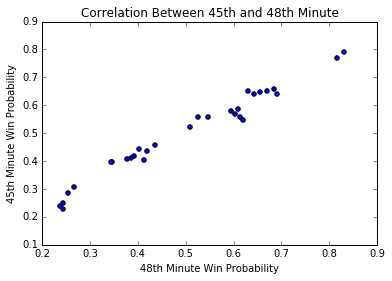

In [21]:
#Create Scatterplot
this_minute = []
this_48 = []
for thisTeam in range(len(nba_minutes)):
        this_minute.append(float(nba_minutes[thisTeam][45]))
        this_48.append(float(nba_minutes[thisTeam][48]))
plt.scatter(this_48, this_minute)
plt.title("Correlation Between 45th and 48th Minute")
plt.xlabel("48th Minute Win Probability")
plt.ylabel("45th Minute Win Probability")
linregression = st.linregress(this_48, this_minute)
print("Linear Regression Slope:", linregression[0])

 ## Conclusion

In conclusion, it is clear that the correlation of the probability of success and the overall outcome increases as  as the game progresses.  This is because the further along the game is, the more concrete the outcome is.  With less time, there is less possibility of a comeback for the losing team, therefore, the probability of success is more related to the overall outcome in the last minutes.  This was confirmed by my testing, with the last three minutes of the game having the most correlation, and can be seen visually within the scatterplots above.  Along with this information, I have also provided the correlation coefficents for each of these minutes.  The highest, as stated prior is the 47th minute, the minute before the end of the game, with the two prior minutes (46, 45) coming in at close second and third.  These coefficents futher support my conclusion, that the minutes that are most correlated with the overall outcome of a game are the last three minutes.  One more piece of evidence for this conclusion was the increasing slope of linear regression throughout minutes.  As the game came closer to an end, the slope of the linear regression line came closer and closer to one, a perfect correlation.  The final slope for linear regression betweeen the 47th and 48th minutes was 0.93, a very statistically signifagent slope.  All of this information continues to support my conclusion, that the last minutes in a game are most correlated with the outcome.